Szükségem van képekre a dolgozatomba, amiket maganak szeretnék csinálni.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.ndimage import gaussian_filter
from skimage.filters import gaussian
from PIL import Image

In [2]:
# Nyissuk meg a fajlt az adatmappabol
mygauss = Image.open('../data/gauss.jpg')

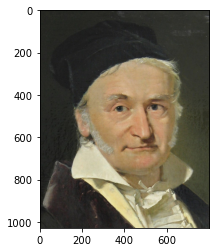

In [3]:
# gaussian smoothing 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html
gaussedgauss = gaussian(np.array(mygauss), sigma=3, multichannel=True)
gaussedgaussedgauss = gaussian(np.array(mygauss), sigma=5, multichannel=True)
plt.imshow(mygauss)

(1029, 800, 3)


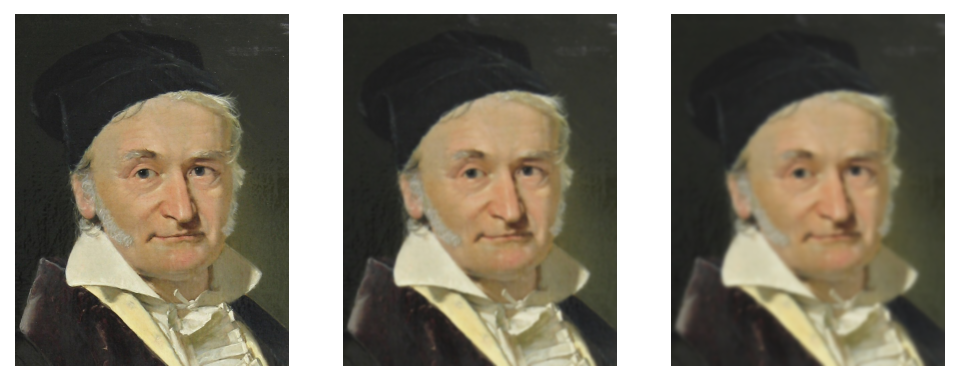

In [4]:
plt.rcParams["figure.figsize"] = (8,8)
fig, axs = plt.subplots(nrows=1, ncols=3, dpi=150)
[axi.set_axis_off() for axi in axs]
axs[0].imshow(mygauss)
axs[1].imshow(gaussedgauss)
axs[2].imshow(gaussedgaussedgauss)

print(np.array(mygauss).shape)

SECOND EXAMPLE - BITTEN APPLE FOR HISTOGRAM - THE PICTURE'S LICENSE IS COMPELTELY FREE

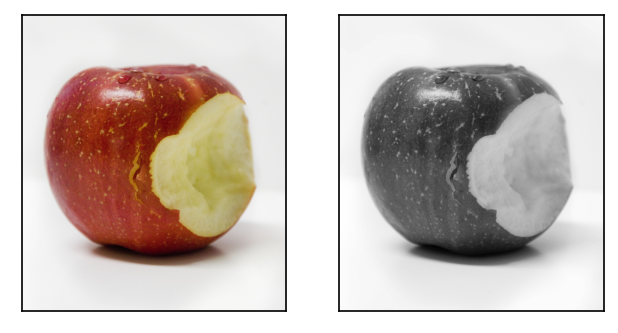

In [5]:
plt.rcParams["figure.figsize"] = (5,5)
myapple = Image.open('../data/apple.jpg')
mygrayapple = myapple.convert('L')
fig, axs = plt.subplots(nrows=1, ncols=2, dpi=150)
[axi.get_yaxis().set_visible(False) for axi in axs]
[axi.get_xaxis().set_visible(False) for axi in axs]
axs[0].imshow(myapple); axs[1].imshow(mygrayapple, cmap= plt.cm.gray);

In [6]:
mygrayapple = np.array(mygrayapple)

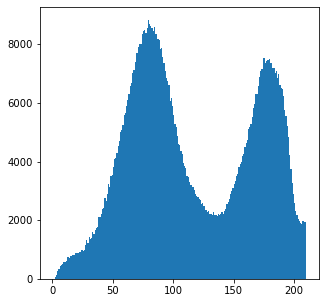

In [7]:
mygrayapplearray = np.array(mygrayapple)
maximum = 210
grayapplebinvalues, bins, patches = plt.hist(mygrayapplearray[mygrayapplearray<maximum].flatten(), maximum, range=(0,maximum))

In [8]:
mask200 = mygrayapplearray>200
appleunder200 = mygrayapplearray.copy()
appleunder200[mask200] = 255

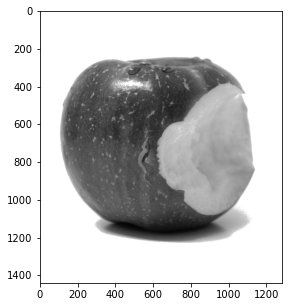

In [9]:
plt.imshow(appleunder200, cmap=plt.cm.gray)

In [10]:
mask135 = mygrayapplearray>135
appleunder135 = mygrayapplearray.copy()
appleunder135[mask135] = 255

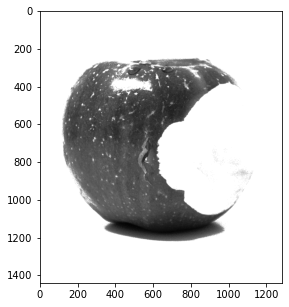

In [11]:
plt.imshow(appleunder135, cmap=plt.cm.gray)

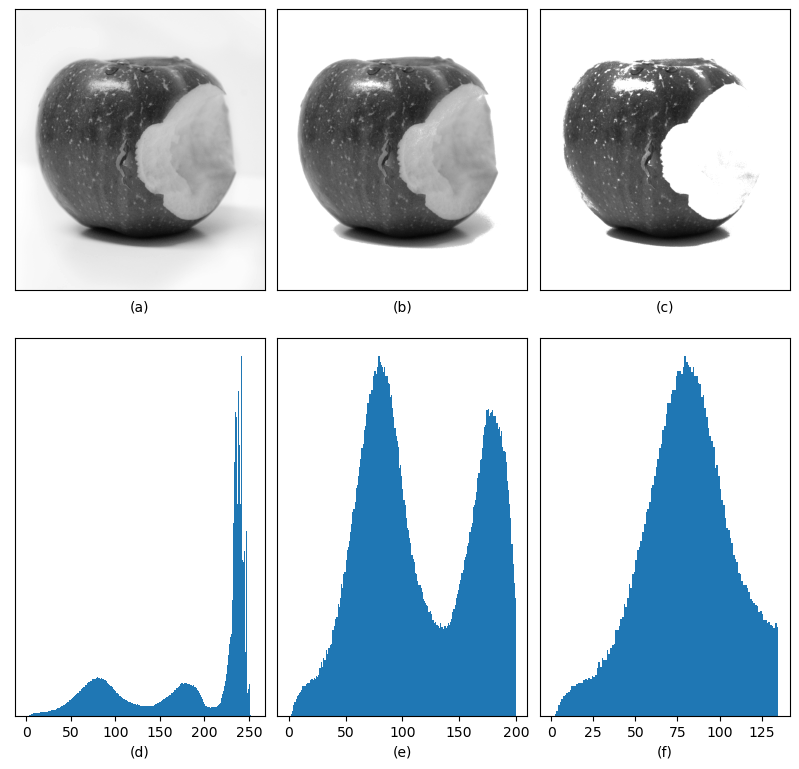

In [12]:
plt.rcParams["figure.figsize"] = (10,10)

fig, axs = plt.subplots(nrows=2, ncols=3, dpi=100)
[axii.get_yaxis().set_visible(False) for axi in axs for axii in axi] # hide y
[axi.get_yaxis().set_visible(False) for axi in axs[0]]
[axi.tick_params(axis=u'both', which=u'both',length=0) for axi in axs[0]]
[axi.set_xticklabels([]) for axi in axs[0]]
 
axs[0][0].imshow(mygrayapple, cmap=plt.cm.gray)
axs[0][0].set_xlabel('(a)')
axs[0][1].imshow(appleunder200, cmap=plt.cm.gray)
axs[0][1].set_xlabel('(b)')
axs[0][2].imshow(appleunder135, cmap=plt.cm.gray)
axs[0][2].set_xlabel('(c)')
_, _, _ = axs[1][0].hist(mygrayapplearray.flatten(), 255, range=(0,255))
axs[1][0].set_xlabel('(d)')
axs[1][0].xaxis.set_major_locator(ticker.MultipleLocator(50))
_, _, _ = axs[1][1].hist(appleunder200[appleunder200<200].flatten(), 200, range=(0,200))
axs[1][1].set_xlabel('(e)')
_, _, _ = axs[1][2].hist(appleunder135[appleunder135<135].flatten(), 135, range=(0,135))
axs[1][2].set_xlabel('(f)')
plt.subplots_adjust(wspace=0.05, hspace=0)

A képfeldolgozás témakörhöz kell egy raszteres pici kép illusztrációnak

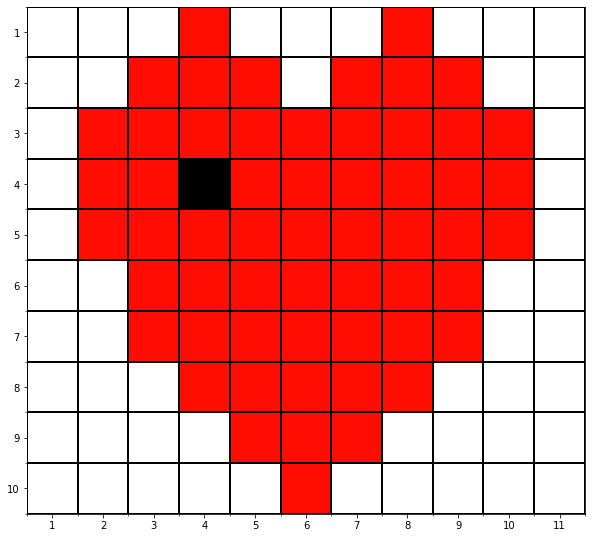

In [13]:
plt.figure()

heart = Image.open('../data/heart.png')


im = plt.imshow(heart,
                interpolation='none', vmin=0, vmax=1, aspect='equal');

ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, 11, 1));
ax.set_yticks(np.arange(0, 10, 1));

# Labels for major ticks
ax.set_xticklabels(np.arange(1, 12, 1));
ax.set_yticklabels(np.arange(1, 11, 1));

# Minor ticks
ax.set_xticks(np.arange(-.5, 11, 1), minor=True);
ax.set_yticks(np.arange(-.5, 10, 1), minor=True);

# Gridlines based on minor ticks
ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
#_ = ax.set_ylim(ax.get_ylim()[::-1]) # invert y